In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

%run ..\Functions.ipynb

In [2]:
obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
stations_csv = r"..\0_insitu\FLUXNET2022.csv"
df_stations = pd.read_csv(stations_csv, sep=';',index_col=0)
df_stations

,Site,Period,Dataset,x,y
0,AR-TF1,2016-2018,AMF,-66.733500,-54.973300
1,CA-Cbo,1994-2020,AMF,-79.933300,44.316700
2,CA-DB2,2019-2020,AMF,-122.995100,49.119000
3,CA-DBB,2014-2020,AMF,-122.984900,49.129300
4,CA-ER1,2015-2020,AMF,-80.412300,43.640500
...,...,...,...,...,...
267,SE-Deg,2001-2020,ICOS-WW,19.557448,64.182333
268,SE-Htm,2015-2020,ICOS-WW,13.417893,56.097566
269,SE-Nor,2014-2020,ICOS-WW,17.478520,60.086990
270,SE-Ros,2014-2020,ICOS-WW,19.738000,64.172500


In [3]:
row = df_stations.iloc[0]
site = row['Site']
obs_folder = obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
obs_fh = os.path.abspath(os.path.join(obs_folder,site+".csv"))
df = pd.read_csv(obs_fh, parse_dates=True,index_col=0)

#remove masked error
start = "2018-01-01"
df = df.loc[start::]
df = df[df['mask']==0]
df.loc[:,'Site']=site
df = df.reset_index() 
df

,Date,AaIi,AaIii,AbIi,AbIii,AaIIi,AbIIi,WaPORv3L1,mask,PMLv2,MODIS,SSEBop,WaPORv3L1-100m,Site
0,2018-01-01,1.815152,1.797770,NaN,NaN,1.800842,NaN,1.6,0,1.981250,1.683906,2.6,1.70,AR-TF1
1,2018-01-11,1.578355,1.562931,NaN,NaN,1.060065,NaN,1.7,0,1.751500,1.633906,2.4,1.80,AR-TF1
2,2018-01-21,1.443526,1.427905,NaN,NaN,0.473640,NaN,1.8,0,1.748636,2.070312,1.7,1.85,AR-TF1
3,2018-02-01,1.792598,1.775629,NaN,NaN,1.762503,NaN,1.5,0,1.679750,1.860469,2.3,1.55,AR-TF1
4,2018-02-11,1.398662,1.384739,NaN,NaN,1.387317,NaN,1.5,0,1.575875,1.427969,2.1,1.50,AR-TF1
5,2018-02-21,1.722765,1.709135,NaN,NaN,1.712505,NaN,2.2,0,1.510312,1.526172,0.8,2.20,AR-TF1
6,2018-03-01,1.244057,1.229870,NaN,NaN,1.232782,NaN,1.7,0,1.343125,1.507031,1.5,1.70,AR-TF1
7,2018-03-11,0.602896,0.595220,NaN,NaN,0.596351,NaN,0.8,0,1.019000,0.977187,1.7,0.80,AR-TF1
8,2018-03-21,1.229332,1.215311,NaN,NaN,1.217095,NaN,1.2,0,0.920795,0.890909,1.6,1.20,AR-TF1
9,2018-04-01,0.348912,0.343611,NaN,NaN,0.344250,NaN,0.6,0,0.582875,0.668125,0.9,0.60,AR-TF1


In [4]:
for i,row in df_stations.iterrows():
    site = row['Site']
    obs_folder = obs_folder=r"..\0_insitu\Data\FLUXNET\FLUXNET2022"
    try:
        obs_fh = os.path.abspath(os.path.join(obs_folder,site+".csv"))
        df = pd.read_csv(obs_fh, parse_dates=True,index_col=0)
        start = "2018-01-01"
        df = df.loc[start::]
        if 'mask' in df.columns:
            df = df[df['mask']==0]
        df.loc[:,'Site']=site
        df = df.reset_index() 
        
        if i== 0:
            df_all = df
        else:
            df_all = pd.concat([df_all, df], axis=0, ignore_index=True)
    except:
        print(f'Error: {obs_fh}')
    

Error: D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_insitu\Data\FLUXNET\FLUXNET2022\US-Wi0.csv
Error: D:\Doctorate\Bich_PhD\research\3_WaPOR\Notebooks\0_insitu\Data\FLUXNET\FLUXNET2022\AU-Adr.csv


In [5]:
len(df_all['Site'].unique()) #number of EC flux sites

222

In [6]:
df_all=df_all.rename(columns= {'MODIS':'MOD16A2GF',
                        'SSEBop':'SSEBopv61'
                       })

In [7]:
from scipy.stats import pearsonr
# --- Custom Function for Annotations ---
def corrfunc(x, y, **kws):
    """
    Calculates and annotates the plot with Pearson r and p-value.
    """
    # Calculate the correlation coefficient and the p-value
    (r, p) = pearsonr(x, y)
    rmsd = np.sqrt(np.mean((x - y) ** 2))
    # Get the current axes
    ax = plt.gca()
    
    # Define the annotation text
    annotation_text = f'$\\rho$ = {r:.2f}\nRMSD = {rmsd:.2f} '+'(mm $d^{-1})$'
    
    # Add the annotation to the plot
    # xy=(.1, .9) places the text at the top-left corner of the subplot
    ax.annotate(annotation_text,
                xy=(.1, .5), 
                xycoords=ax.transAxes,
                fontsize = 12,
                ha='left', 
                va='top')

<Figure size 500x500 with 0 Axes>

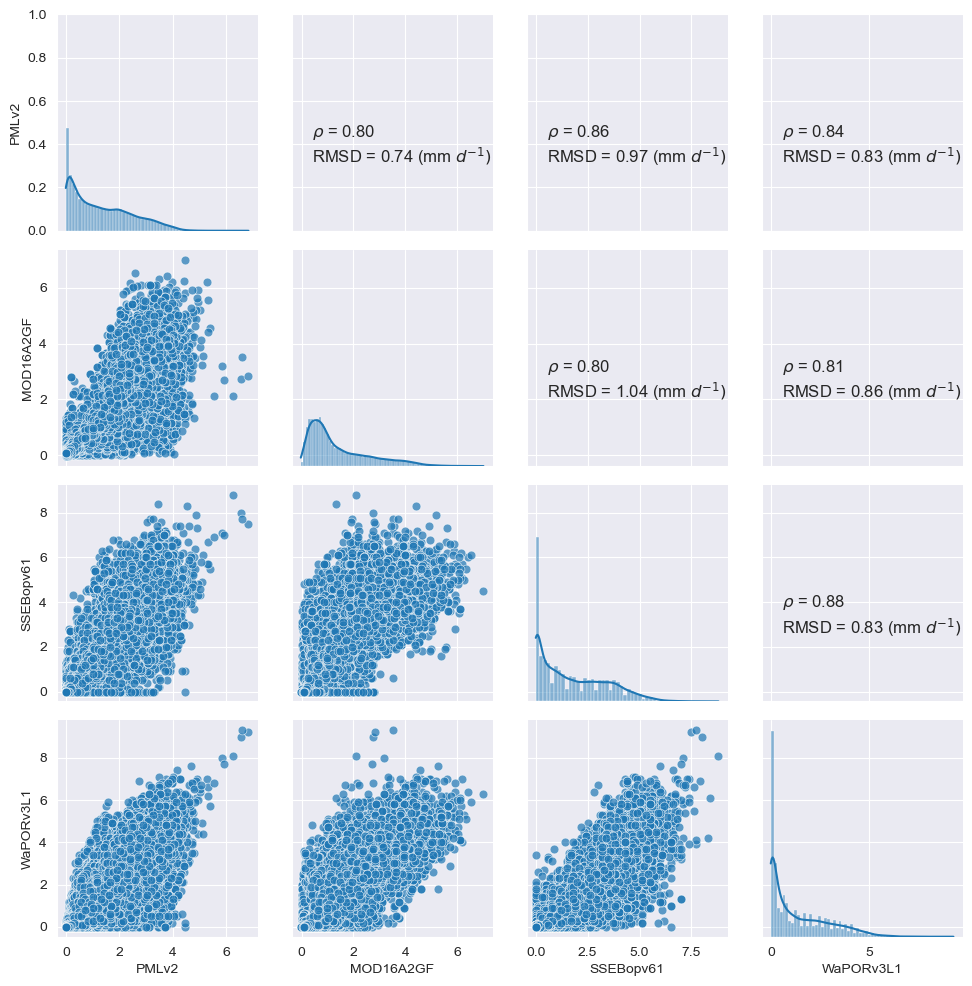

In [8]:
df_triple= df_all[['PMLv2','MOD16A2GF','SSEBopv61','WaPORv3L1']].dropna()
# --- Create the PairGrid Plot ---
plt.figure(figsize=(5, 5))
sns.set_style("darkgrid")
# 1. Initialize a PairGrid object
g = sns.PairGrid(df_triple, corner=False)

# 2. Map plots to the different sections of the grid
# Scatter plots on the lower triangle
g.map_lower(sns.scatterplot, s=40, alpha=0.7)

# Histograms on the diagonal
g.map_diag(sns.histplot, kde=True)

# Our custom function on the upper triangle
g.map_upper(corrfunc)

# Add a title for the entire plot
# g.fig.suptitle('Correlogram with Correlation Coefficients and P-Values at 215 EC sites', y=1.02)

# 3. Show the plot
plt.savefig('Figure/scatterplot_TCH_assumptions.png')
plt.show()


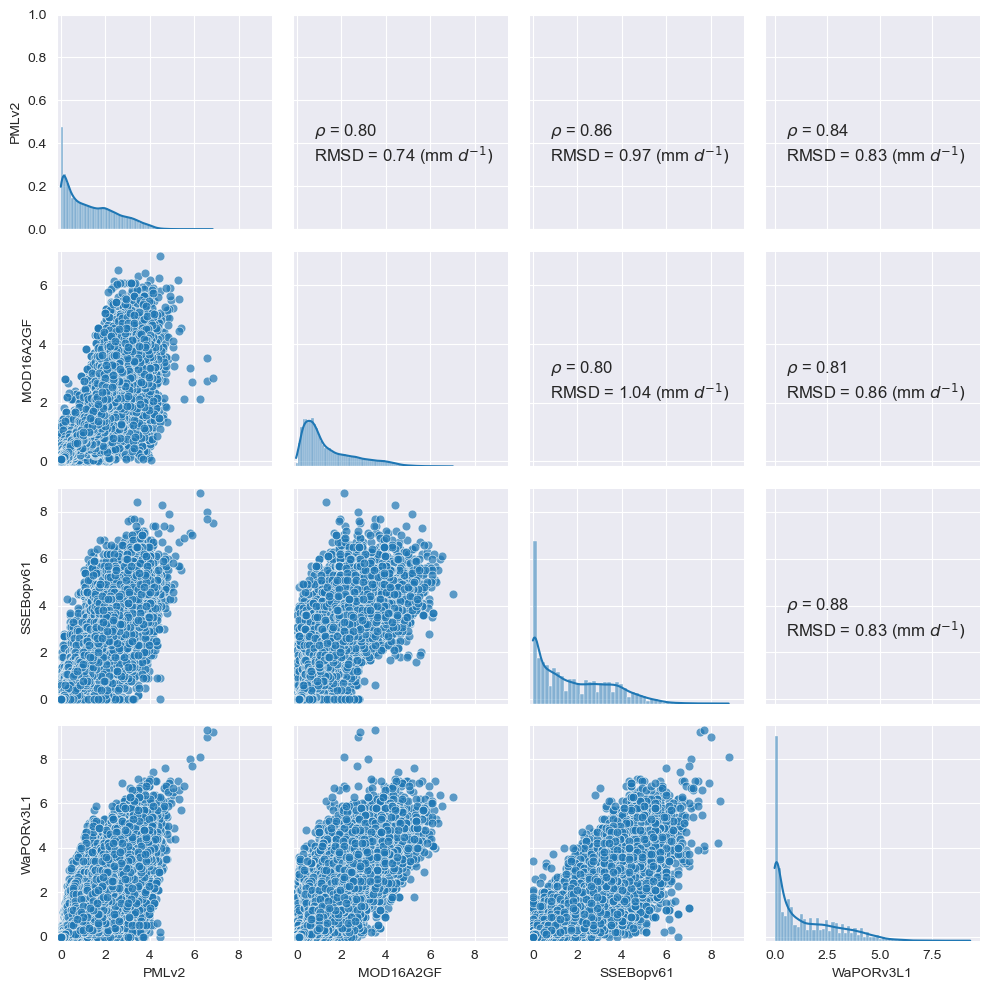

In [11]:
df_triple = df_all[['PMLv2','MOD16A2GF','SSEBopv61','WaPORv3L1']].dropna()

# compute min/max per variable with padding
pad = 0.02
lims = {}
for col in df_triple.columns:
    vmin, vmax = df_triple[col].min(), df_triple[col].max()
    span = vmax - vmin
    if span == 0:
        vmin -= 0.5; vmax += 0.5
    else:
        vmin -= pad * span; vmax += pad * span
    lims[col] = (vmin, vmax)

sns.set_style("darkgrid")
g = sns.PairGrid(df_triple, corner=False)
g.map_lower(sns.scatterplot, s=40, alpha=0.7)
g.map_diag(sns.histplot, kde=True)
g.map_upper(corrfunc)

# Enforce equal scales for each lower-triangle scatter:
cols = list(df_triple.columns)
n = len(cols)
for i in range(n):
    for j in range(n):
        ax = g.axes[i, j]
        if ax is None:
            continue
        # lower triangle only (row index > col index)
        if i > j:
            xvar = cols[j]   # column index -> x variable
            yvar = cols[i]   # row index -> y variable
            # get combined limits that cover both variables
            xmin, xmax = lims[xvar]
            ymin, ymax = lims[yvar]
            # choose a symmetric scale so x and y have same span
            span = max(xmax - xmin, ymax - ymin)
            # center each axis on its midpoint with the chosen span
            xmid = (xmin + xmax) / 2
            ymid = (ymin + ymax) / 2
            new_xlim = (xmid - span / 2, xmid + span / 2)
            new_ylim = (ymid - span / 2, ymid + span / 2)
            ax.set_xlim(new_ylim)
            ax.set_ylim(new_ylim)

g.fig.tight_layout()
# g.fig.savefig('Figure/scatterplot_TCH_assumptions.png', dpi=300)
plt.show()

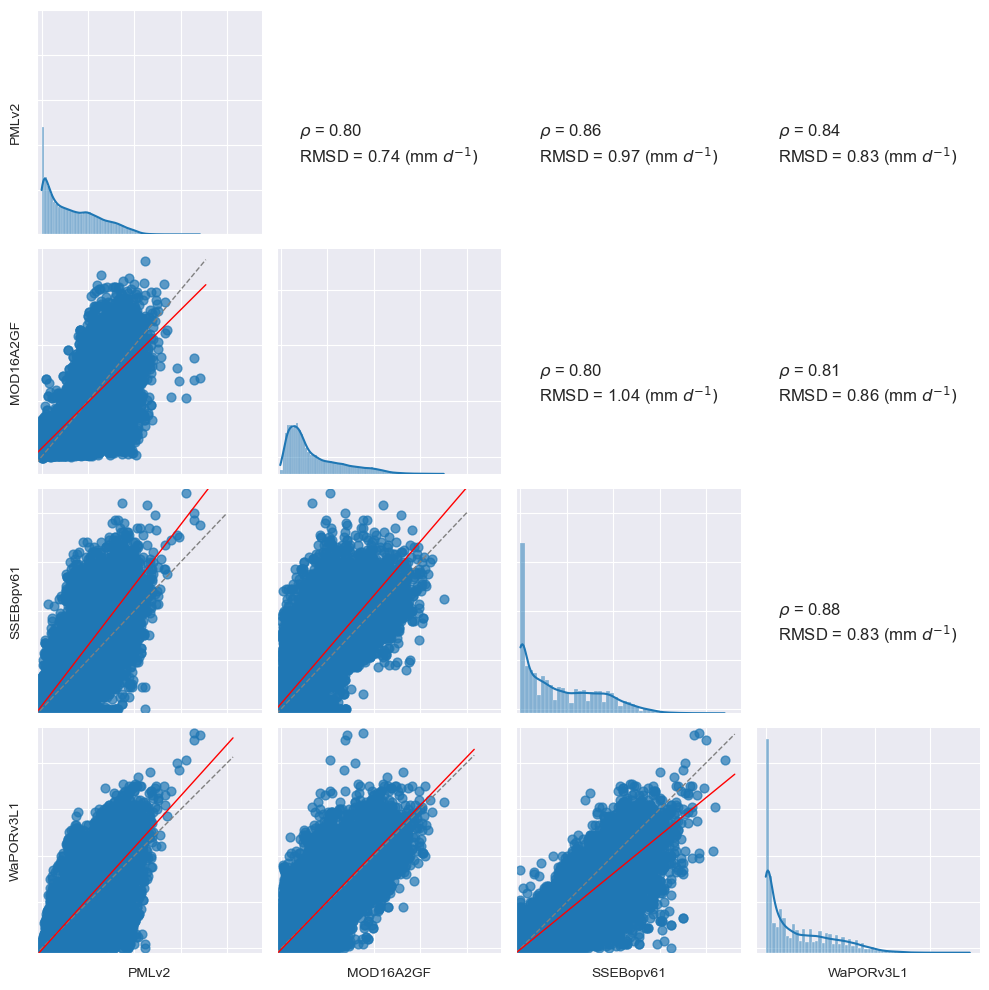

In [21]:
df_triple = df_all[['PMLv2','MOD16A2GF','SSEBopv61','WaPORv3L1']].dropna()

# compute min/max per variable with padding
pad = 0.02
cols = list(df_triple.columns)
lims = {}
for col in cols:
    vmin, vmax = df_triple[col].min(), df_triple[col].max()
    span = vmax - vmin
    if span == 0:
        vmin -= 0.5; vmax += 0.5
    else:
        vmin -= pad * span; vmax += pad * span
    lims[col] = (vmin, vmax)

sns.set_style("darkgrid")
g = sns.PairGrid(df_triple, corner=False)

# Custom scatter function that adds 1:1 line and regression line
def scatter_with_lines(x, y, **kwargs):
    ax = plt.gca()
    # determine this axis position by finding ax in g.axes
    found = False
    for i in range(len(cols)):
        for j in range(len(cols)):
            if g.axes[i, j] is ax:
                row, col = i, j
                found = True
                break
        if found:
            break

    # set labels from original dataframe column names
    if found:
        ax.set_xlabel(cols[col])
        ax.set_ylabel(cols[row])

    # scatter
    # ax.scatter(x, y, s=40, alpha=0.7, **{k: v for k, v in kwargs.items() if k in ("c","marker")})
    sns.scatterplot(
        x=x, y=y, ax=ax, legend=False,
        s=40, marker="o", edgecolor="face", linewidth=0,
        facecolors=None,  # let seaborn/matplotlib pick from palette
        alpha=0.7,
        **{k: v for k, v in kwargs.items() if k in ("hue","palette","style","size")}
    )
    # 1:1 line — use current extents
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    low = min(xmin, ymin)
    high = max(xmax, ymax)
    ax.plot([low, high], [low, high], color='gray', linestyle='--', linewidth=1)

    # regression line
    mask = (~np.isnan(x)) & (~np.isnan(y))
    if mask.sum() > 1:
        slope, intercept, _, _, _ = stats.linregress(x[mask], y[mask])
        xs = np.array([low, high])
        ax.plot(xs, intercept + slope * xs, color='red', linewidth=1)

# Use regular hist on diag and your corrfunc on upper
g.map_lower(scatter_with_lines)
g.map_diag(sns.histplot, kde=True)

# For upper: call corrfunc but strip grid/background
def corrfunc_no_bg(x, y, **kwargs):
    ax = plt.gca()
    # remove grid/background for this Axes
    ax.set_facecolor('none')
    for spine in ax.spines.values():
        spine.set_visible(True)
    ax.grid(False)
    # call your corrfunc implementation (assumes it plots text on ax)
    corrfunc(x, y, **kwargs)

g.map_upper(corrfunc_no_bg)

# Enforce equal scales for each lower-triangle scatter (make x and y spans equal)
n = len(cols)
for i in range(n):
    for j in range(n):
        ax = g.axes[i, j]
        if ax is None:
            continue
        if i > j:  # lower triangle: row i, col j -> yvar = cols[i], xvar = cols[j]
            xvar = cols[j]
            yvar = cols[i]
            xmin, xmax = lims[xvar]
            ymin, ymax = lims[yvar]
            span = max(xmax - xmin, ymax - ymin)
            xmid = (xmin + xmax) / 2
            ymid = (ymin + ymax) / 2
            new_xlim = (xmid - span / 2, xmid + span / 2)
            new_ylim = (ymid - span / 2, ymid + span / 2)
            ax.set_xlim(new_ylim)
            ax.set_ylim(new_ylim)
            # re-draw 1:1 and regression lines to match new limits
            #  (clear and replot points then lines)
            xdata = df_triple[xvar].values
            ydata = df_triple[yvar].values
            ax.cla()
            ax.scatter(xdata, ydata, s=40, alpha=0.7)
            low, high = new_xlim[0], new_xlim[1]  # x and y spans same
            ax.plot([low, high], [low, high], color='gray', linestyle='--', linewidth=1)
            mask = (~np.isnan(xdata)) & (~np.isnan(ydata))
            if mask.sum() > 1:
                slope, intercept, _, _, _ = stats.linregress(xdata[mask], ydata[mask])
                xs = np.array([low, high])
                ax.plot(xs, intercept + slope * xs, color='red', linewidth=1)
# Reapply labels for every subplot using grid indices
n = len(cols)
for i in range(n):
    for j in range(n):
        ax = g.axes[i, j]
        if ax is None:
            continue
        # x label is the column for this column index; y label is the row's column
        ax.set_xlabel(cols[j])
        ax.set_ylabel(cols[i])
        # optional: only show tick labels on edge plots
        if i != n - 1:
            ax.set_xticklabels([])
        if j != 0:
            ax.set_yticklabels([])
# tighten and save
g.fig.tight_layout()
plt.show()

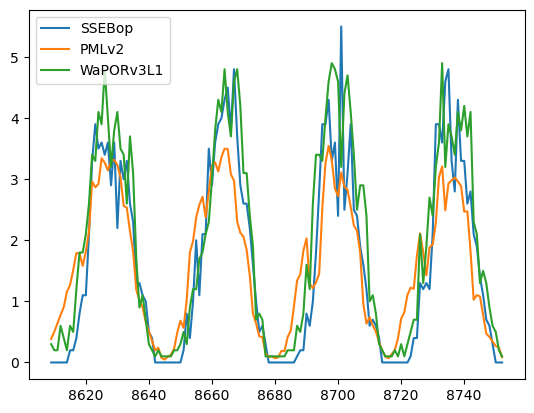

In [36]:
df_all[df_all['Site']=='US-Vcp']['SSEBop'].plot()
df_all[df_all['Site']=='US-Vcp']['PMLv2'].plot()
df_all[df_all['Site']=='US-Vcp']['WaPORv3L1'].plot()
plt.legend()

C:\Users\ntr002\AppData\Local\Temp\ipykernel_23988\5613427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['PMLv2 residual'] = df_['PMLv2'] - df_.loc[: , "PMLv2":"SSEBop"].mean(axis=1)
C:\Users\ntr002\AppData\Local\Temp\ipykernel_23988\5613427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['WaPORv3L1 residual'] = df_['WaPORv3L1'] - df_.loc[: , "PMLv2":"SSEBop"].mean(axis=1)
C:\Users\ntr002\AppData\Local\Temp\ipykernel_23988\5613427.py:4: SettingWithCopyWarning: 
A value is trying to be set 

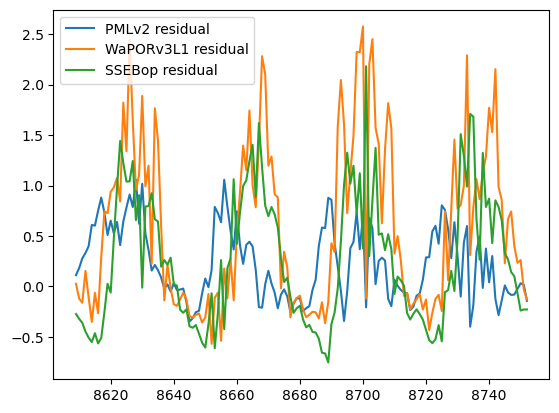

In [39]:
df_=df_all[df_all['Site']=='US-Vcp']
df_['PMLv2 residual'] = df_['PMLv2'] - df_.loc[: , "PMLv2":"SSEBop"].mean(axis=1)
df_['WaPORv3L1 residual'] = df_['WaPORv3L1'] - df_.loc[: , "PMLv2":"SSEBop"].mean(axis=1)
df_['SSEBop residual'] = df_['SSEBop'] - df_.loc[: , "PMLv2":"SSEBop"].mean(axis=1)

df_['PMLv2 residual'].plot()
df_['WaPORv3L1 residual'].plot()
df_['SSEBop residual'].plot()
plt.legend()

In [44]:
from pytesmo.metrics import tcol_metrics

df_all = df_all.dropna()
x = df_all['PMLv2']
y = df_all['WaPORv3L1'] 
z = df_all['SSEBop'] 


snr, err, beta = tcol_metrics(x, y, z)
print(f"Error of PMLv2: {err[0]:.4f}")
print(f"Error of WaPORv3L1: {err[1]:.4f}")
print(f"Error of SSEBop: {err[2]:.4f}")

Error of PMLv2: 0.5008
Error of WaPORv3L1: 0.5006
Error of SSEBop: 0.3026


# Synthetic data

Example from: https://tuw-geo-pytesmo.readthedocs.io/en/latest/examples/triple_collocation.html

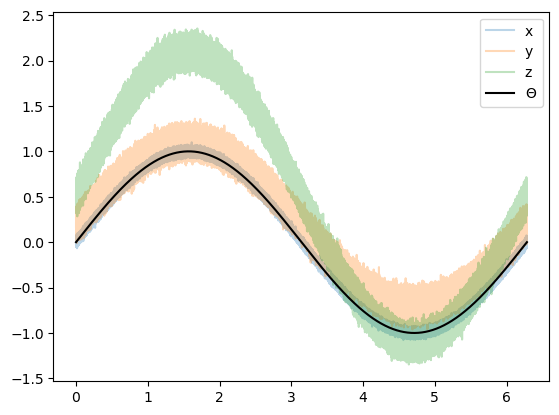

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# number of observations
n = 1000000
# x coordinates for initializing the sine curve
coord = np.linspace(0, 2*np.pi, n)
signal = np.sin(coord)

# error i.e. epsilon of the three synthetic time series
sig_err_x = 0.02
sig_err_y = 0.07
sig_err_z = 0.04
err_x = np.random.normal(0, sig_err_x, n)
err_y = np.random.normal(0, sig_err_y, n)
err_z = np.random.normal(0, sig_err_z, n)

# additive and multiplicative biases
# they are assumed to be zero for dataset x
alpha_y = 0.2
alpha_z = 0.5

beta_y = 0.9
beta_z = 1.6

x = signal + err_x
# here we assume errors that are already scaled
y = alpha_y + beta_y * (signal + err_y)
z = alpha_z + beta_z * (signal + err_z)

plt.plot(coord, x, alpha=0.3, label='x')
plt.plot(coord, y, alpha=0.3, label='y')
plt.plot(coord, z, alpha=0.3, label='z')
plt.plot(coord, signal, 'k', label=r'$\Theta$')
plt.legend();

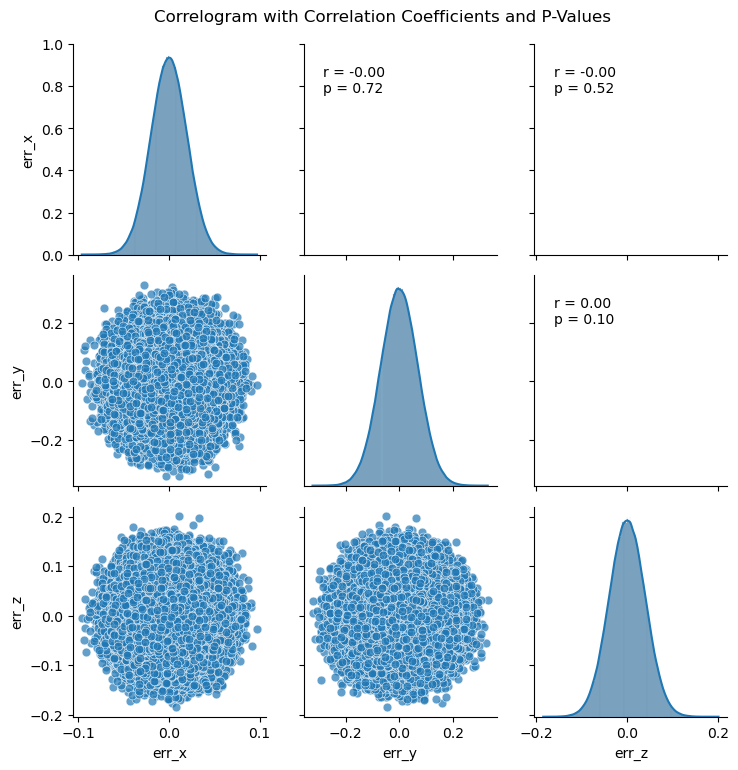

In [55]:
df_errors = pd.DataFrame(
    {
        'err_x':err_x,
        'err_y':err_y,
        'err_z':err_z
    }
)

g = sns.PairGrid(df_errors, corner=False)

# 2. Map plots to the different sections of the grid
# Scatter plots on the lower triangle
g.map_lower(sns.scatterplot, s=40, alpha=0.7)

# Histograms on the diagonal
g.map_diag(sns.histplot, kde=True)

# Our custom function on the upper triangle
g.map_upper(corrfunc)

# Add a title for the entire plot
g.fig.suptitle('Correlogram with Correlation Coefficients and P-Values', y=1.02)

# 3. Show the plot
plt.show()

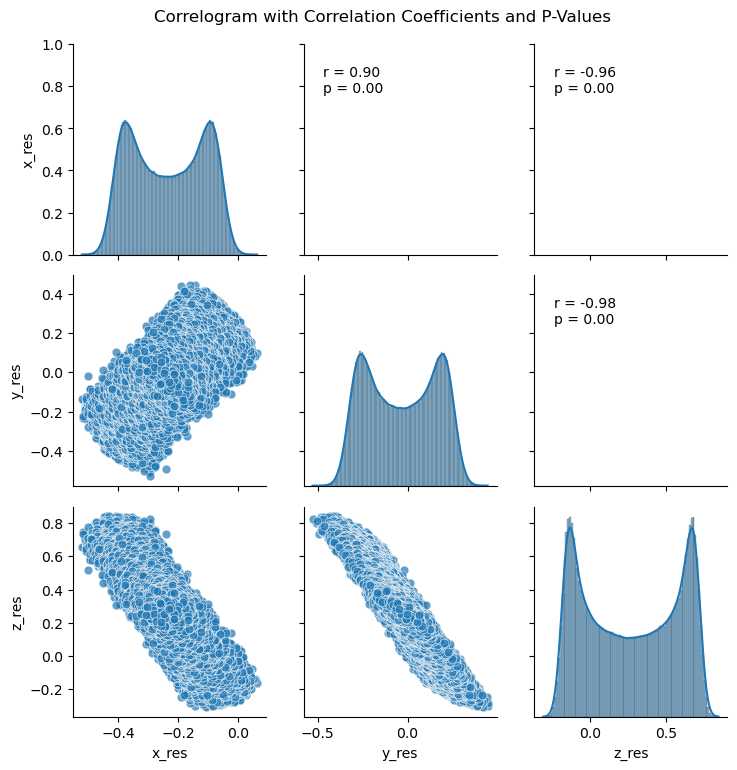

In [56]:
x_res = x - np.mean([x,y,z],  axis=0)
y_res = y - np.mean([x,y,z],  axis=0)
z_res = z - np.mean([x,y,z],  axis=0)

df_errors = pd.DataFrame(
    {
        'x_res':x_res,
        'y_res':y_res,
        'z_res':z_res
    }
)

g = sns.PairGrid(df_errors, corner=False)

# 2. Map plots to the different sections of the grid
# Scatter plots on the lower triangle
g.map_lower(sns.scatterplot, s=40, alpha=0.7)

# Histograms on the diagonal
g.map_diag(sns.histplot, kde=True)

# Our custom function on the upper triangle
g.map_upper(corrfunc)

# Add a title for the entire plot
g.fig.suptitle('Correlogram with Correlation Coefficients and P-Values', y=1.02)

# 3. Show the plot
plt.show()